In [2]:
import os
import sys
import shutil

# 1. NETTOYAGE : On supprime l'ancien dossier s'il existe pour être sûr d'avoir la dernière version
if os.path.exists('projet-3A'):
    shutil.rmtree('projet-3A')
    print(" Ancien dossier supprimé.")

# 2. CLONE : On télécharge la version à jour
!git clone https://github.com/Georges-Imaho/projet-3A.git
print("✅ Dépôt cloné avec succès.")

# On se place dans le dossier
os.chdir('projet-3A')
# On ajoute le dossier courant au path pour que Python trouve le dossier 'src'
if os.getcwd() not in sys.path:
    sys.path.append(os.getcwd())

print("✅ Environnement configuré. Dossier actuel :", os.getcwd())

# --- 2. IMPORTS DES LIBRAIRIES ---
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm # Barre de chargement

# --- 3. IMPORTS DE TES MODULES PERSONNELS ---
try:
    from src.market_simulator import MarketSimulator
    from src.analytics_models import BlackScholesOracle
    from src.deep_hedger import DeepHedgingModel
    from src.hedging_engine import HedgingEngine
    print("✅ Modules 'src' importés avec succès !")
except ImportError as e:
    print(f"❌ Erreur d'import : {e}")
    print("Vérifie que les fichiers sont bien présents dans le dossier src/ sur GitHub.")

# Configuration graphique
sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)

Cloning into 'projet-3A'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 123 (delta 75), reused 88 (delta 40), pack-reused 0 (from 0)
Receiving objects: 100% (123/123), 6.63 MiB | 9.31 MiB/s, done.
Resolving deltas: 100% (75/75), done.
✅ Dépôt cloné avec succès.
✅ Environnement configuré. Dossier actuel : /Users/jeenyuhs/Desktop/projet_sauvetage/notebook/projet-3A/projet-3A
✅ Modules 'src' importés avec succès !


In [3]:
def prepare_batch(simulator, batch_size, T, steps, strike=100.0):
    # 1. Simulation HESTON (Inchangé)
    paths, vols = simulator.simulate_heston(
        steps=steps, n_paths=batch_size, kappa=2.0, theta=0.04, xi=0.3, rho=-0.7
    )
    
    paths, vols = simulator.simulate_heston(
        steps=steps, n_paths=batch_size, kappa=2.0, theta=0.04, xi=0.3, rho=-0.7
    )
    
    # SÉCURITÉ : On remplace les valeurs <= 0 par un tout petit chiffre pour éviter log(0)
    paths = np.maximum(paths, 1e-4)
    vols = np.maximum(vols, 1e-4)

    spot_paths = torch.tensor(paths.T, dtype=torch.float32)
    vol_paths = torch.tensor(vols.T, dtype=torch.float32)

    # ... (Reste du calcul des features identique) ...
    # Feature A: Moneyness
    log_moneyness = torch.log(spot_paths / strike)
    
    # Feature B: Time
    time_grid = torch.linspace(T, 0, steps+1)
    time_feature = time_grid.unsqueeze(0).repeat(batch_size, 1)
    
    # Feature C: Returns (Avec sécurité NaN)
    zeros = torch.zeros((batch_size, 1))
    # On ajoute 1e-6 pour la stabilité
    log_returns = torch.diff(torch.log(spot_paths), dim=1)
    log_returns = torch.nan_to_num(log_returns, nan=0.0) # Sécurité ultime
    log_returns = torch.cat([zeros, log_returns], dim=1)
    
    # Feature D: Vol
    vol_feature = (vol_paths - 0.2) / 0.1 

    # Vérifie bien l'ordre : Moneyness, Time, Vol, Returns
    inputs = torch.stack([log_moneyness, time_feature, vol_feature, log_returns], dim=-1)
    
    return spot_paths, inputs

  0%|          | 0/3000 [00:00<?, ?it/s]/Users/jeenyuhs/Desktop/projet_sauvetage/notebook/projet-3A/projet-3A/src/analytics_models.py:30: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
Ep 0 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   0%|          | 1/3000 [00:00<05:24,  9.25it/s]

🚀 Démarrage du Curriculum Learning (Optimisé)...
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 20 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   1%|          | 18/3000 [00:00<00:45, 65.24it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 30 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   1%|          | 34/3000 [00:00<00:41, 71.07it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 50 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   2%|▏         | 51/3000 [00:00<00:39, 75.33it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 70 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   2%|▏         | 68/3000 [00:01<00:37, 77.56it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 80 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   3%|▎         | 84/3000 [00:01<00:38, 76.15it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 100 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   3%|▎         | 100/3000 [00:01<00:39, 73.06it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 110 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   4%|▍         | 116/3000 [00:01<00:41, 69.66it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 130 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   4%|▍         | 132/3000 [00:01<00:39, 73.19it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 140 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   5%|▌         | 150/3000 [00:02<00:36, 77.35it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 160 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   6%|▌         | 168/3000 [00:02<00:35, 79.77it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 180 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   6%|▌         | 176/3000 [00:02<00:35, 79.58it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 200 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   6%|▋         | 194/3000 [00:02<00:34, 81.06it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 210 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   7%|▋         | 212/3000 [00:02<00:33, 82.12it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 230 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   8%|▊         | 230/3000 [00:03<00:33, 82.46it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 250 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   8%|▊         | 248/3000 [00:03<00:34, 80.62it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 260 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   9%|▉         | 265/3000 [00:03<00:34, 79.53it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 280 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:   9%|▉         | 282/3000 [00:03<00:35, 76.97it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 290 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  10%|█         | 300/3000 [00:03<00:33, 79.97it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 310 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  10%|█         | 309/3000 [00:04<00:33, 80.29it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 330 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  11%|█         | 327/3000 [00:04<00:33, 79.72it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 340 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  11%|█▏        | 343/3000 [00:04<00:33, 79.34it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 360 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  12%|█▏        | 361/3000 [00:04<00:32, 80.84it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 380 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  13%|█▎        | 379/3000 [00:04<00:32, 79.53it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 390 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  13%|█▎        | 395/3000 [00:05<00:33, 78.69it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 410 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  14%|█▎        | 411/3000 [00:05<00:35, 72.22it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 420 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  14%|█▍        | 429/3000 [00:05<00:33, 77.28it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 440 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  15%|█▍        | 446/3000 [00:05<00:32, 78.55it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 460 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  15%|█▌        | 463/3000 [00:06<00:32, 79.20it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 470 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  16%|█▌        | 479/3000 [00:06<00:31, 79.21it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 490 | Cost: 0.0% | Loss (MSE): 0.00e+00 | PnL: 0.00:  16%|█▋        | 495/3000 [00:06<00:32, 78.26it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 510 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  17%|█▋        | 511/3000 [00:06<00:31, 77.82it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 520 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  18%|█▊        | 529/3000 [00:06<00:30, 79.91it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 540 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  18%|█▊        | 546/3000 [00:07<00:30, 81.01it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 560 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  18%|█▊        | 555/3000 [00:07<00:32, 74.54it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 570 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  19%|█▉        | 572/3000 [00:07<00:31, 76.90it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 590 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  20%|█▉        | 590/3000 [00:07<00:30, 79.82it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 610 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  20%|██        | 608/3000 [00:07<00:29, 79.80it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 620 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  21%|██        | 624/3000 [00:08<00:30, 78.26it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 640 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  21%|██▏       | 640/3000 [00:08<00:30, 77.96it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 650 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  22%|██▏       | 656/3000 [00:08<00:30, 77.58it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 670 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  22%|██▏       | 672/3000 [00:08<00:30, 77.05it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 680 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  23%|██▎       | 688/3000 [00:08<00:30, 76.75it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 700 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  23%|██▎       | 704/3000 [00:09<00:31, 72.71it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 720 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  24%|██▍       | 720/3000 [00:09<00:30, 74.82it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 730 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  25%|██▍       | 736/3000 [00:09<00:29, 76.10it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 750 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  25%|██▌       | 752/3000 [00:09<00:29, 76.76it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 760 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  26%|██▌       | 768/3000 [00:09<00:29, 76.93it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 780 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  26%|██▌       | 784/3000 [00:10<00:28, 76.97it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 800 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  27%|██▋       | 800/3000 [00:10<00:28, 77.67it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 810 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  27%|██▋       | 816/3000 [00:10<00:28, 76.92it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 830 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  28%|██▊       | 832/3000 [00:10<00:29, 73.37it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 840 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  28%|██▊       | 840/3000 [00:10<00:29, 74.23it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 860 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  29%|██▊       | 856/3000 [00:11<00:28, 75.14it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 870 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  29%|██▉       | 880/3000 [00:11<00:27, 76.64it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 890 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  30%|██▉       | 888/3000 [00:11<00:27, 75.99it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 910 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  30%|███       | 904/3000 [00:11<00:27, 76.44it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 920 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  31%|███       | 928/3000 [00:12<00:26, 76.83it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 940 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  31%|███       | 936/3000 [00:12<00:27, 76.43it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 950 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  32%|███▏      | 952/3000 [00:12<00:26, 76.43it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 970 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  32%|███▏      | 968/3000 [00:12<00:28, 72.00it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 980 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  33%|███▎      | 984/3000 [00:12<00:27, 73.97it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1000 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  33%|███▎      | 1000/3000 [00:13<00:26, 75.00it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1020 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  34%|███▍      | 1016/3000 [00:13<00:26, 76.12it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1030 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  34%|███▍      | 1032/3000 [00:13<00:25, 76.35it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1050 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  35%|███▍      | 1048/3000 [00:13<00:25, 76.75it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1060 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  35%|███▌      | 1064/3000 [00:13<00:25, 76.61it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1080 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  36%|███▌      | 1080/3000 [00:14<00:26, 73.14it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1090 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  37%|███▋      | 1096/3000 [00:14<00:24, 76.33it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1110 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  37%|███▋      | 1112/3000 [00:14<00:25, 74.88it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1120 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  38%|███▊      | 1128/3000 [00:14<00:25, 72.69it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1140 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  38%|███▊      | 1144/3000 [00:14<00:25, 74.23it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1150 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  39%|███▊      | 1160/3000 [00:15<00:24, 74.72it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1170 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  39%|███▉      | 1176/3000 [00:15<00:24, 75.78it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1180 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  39%|███▉      | 1184/3000 [00:15<00:25, 70.08it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1200 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  40%|████      | 1200/3000 [00:15<00:24, 72.79it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1210 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  41%|████      | 1216/3000 [00:16<00:27, 64.81it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1230 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  41%|████      | 1231/3000 [00:16<00:26, 67.05it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1240 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  42%|████▏     | 1247/3000 [00:16<00:25, 69.74it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1260 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  42%|████▏     | 1263/3000 [00:16<00:24, 72.07it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1270 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  43%|████▎     | 1279/3000 [00:16<00:23, 74.20it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1290 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  43%|████▎     | 1287/3000 [00:17<00:24, 69.62it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1300 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  43%|████▎     | 1303/3000 [00:17<00:23, 72.47it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1320 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  44%|████▍     | 1319/3000 [00:17<00:23, 72.47it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1330 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  44%|████▍     | 1335/3000 [00:17<00:22, 73.53it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1350 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  45%|████▌     | 1351/3000 [00:17<00:23, 70.17it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1360 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  46%|████▌     | 1367/3000 [00:18<00:22, 72.27it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1380 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  46%|████▌     | 1384/3000 [00:18<00:21, 74.79it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1390 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  46%|████▋     | 1392/3000 [00:18<00:23, 68.58it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1410 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  47%|████▋     | 1406/3000 [00:18<00:23, 67.45it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1420 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  47%|████▋     | 1420/3000 [00:18<00:23, 68.04it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1430 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  48%|████▊     | 1435/3000 [00:19<00:22, 69.69it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1450 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  48%|████▊     | 1451/3000 [00:19<00:22, 70.33it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1460 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  49%|████▉     | 1466/3000 [00:19<00:22, 69.11it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1480 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  49%|████▉     | 1481/3000 [00:19<00:21, 70.18it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1490 | Cost: 0.1% | Loss (MSE): 0.00e+00 | PnL: 0.00:  50%|████▉     | 1496/3000 [00:19<00:22, 67.14it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1510 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  50%|█████     | 1511/3000 [00:20<00:21, 68.14it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1520 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  51%|█████     | 1519/3000 [00:20<00:21, 69.72it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1540 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  51%|█████     | 1535/3000 [00:20<00:20, 71.94it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1550 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  52%|█████▏    | 1551/3000 [00:20<00:20, 72.26it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1570 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  52%|█████▏    | 1567/3000 [00:21<00:20, 70.19it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1580 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  53%|█████▎    | 1584/3000 [00:21<00:18, 74.84it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 1600 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  53%|█████▎    | 1600/3000 [00:21<00:19, 72.66it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1610 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  54%|█████▍    | 1617/3000 [00:21<00:18, 76.65it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 1630 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  54%|█████▍    | 1634/3000 [00:21<00:17, 78.57it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 1650 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  55%|█████▌    | 1651/3000 [00:22<00:16, 79.54it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 1670 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  56%|█████▌    | 1668/3000 [00:22<00:16, 79.87it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1680 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  56%|█████▌    | 1684/3000 [00:22<00:16, 79.72it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 1700 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  57%|█████▋    | 1701/3000 [00:22<00:16, 80.00it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 1710 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  57%|█████▋    | 1717/3000 [00:22<00:16, 76.23it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1730 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  58%|█████▊    | 1734/3000 [00:23<00:16, 78.44it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 1750 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  58%|█████▊    | 1750/3000 [00:23<00:15, 78.31it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1760 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  59%|█████▉    | 1766/3000 [00:23<00:16, 76.60it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1780 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  59%|█████▉    | 1782/3000 [00:23<00:15, 76.38it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1790 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  60%|█████▉    | 1798/3000 [00:23<00:15, 75.94it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1810 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  60%|██████    | 1814/3000 [00:24<00:16, 72.70it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1820 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  61%|██████    | 1830/3000 [00:24<00:15, 74.17it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1840 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  62%|██████▏   | 1846/3000 [00:24<00:15, 75.01it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1860 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  62%|██████▏   | 1862/3000 [00:24<00:15, 75.16it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1870 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  63%|██████▎   | 1878/3000 [00:25<00:14, 75.28it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1890 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  63%|██████▎   | 1894/3000 [00:25<00:14, 74.11it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1900 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  63%|██████▎   | 1902/3000 [00:25<00:14, 74.24it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1920 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  64%|██████▍   | 1918/3000 [00:25<00:15, 70.85it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1930 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  64%|██████▍   | 1934/3000 [00:25<00:14, 72.81it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1950 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  65%|██████▌   | 1950/3000 [00:26<00:14, 74.46it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1960 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  66%|██████▌   | 1966/3000 [00:26<00:13, 74.22it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 1980 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  66%|██████▌   | 1982/3000 [00:26<00:13, 75.15it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2000 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  67%|██████▋   | 1998/3000 [00:26<00:13, 75.29it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2010 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  67%|██████▋   | 2014/3000 [00:26<00:14, 70.12it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2020 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  68%|██████▊   | 2030/3000 [00:27<00:13, 69.48it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2040 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  68%|██████▊   | 2038/3000 [00:27<00:13, 70.30it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2060 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  68%|██████▊   | 2055/3000 [00:27<00:12, 74.71it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2070 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  69%|██████▉   | 2073/3000 [00:27<00:11, 78.46it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2090 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  70%|██████▉   | 2091/3000 [00:27<00:11, 80.70it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2110 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  70%|███████   | 2109/3000 [00:28<00:11, 78.42it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2120 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  71%|███████   | 2127/3000 [00:28<00:10, 80.62it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2140 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  72%|███████▏  | 2145/3000 [00:28<00:10, 81.96it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2150 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  72%|███████▏  | 2154/3000 [00:28<00:10, 81.66it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2170 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  72%|███████▏  | 2171/3000 [00:28<00:10, 78.11it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2190 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  73%|███████▎  | 2188/3000 [00:29<00:10, 79.62it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2210 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  74%|███████▎  | 2206/3000 [00:29<00:09, 81.33it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2220 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  74%|███████▍  | 2224/3000 [00:29<00:09, 82.63it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2240 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  75%|███████▍  | 2242/3000 [00:29<00:09, 80.38it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2250 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  75%|███████▌  | 2259/3000 [00:30<00:09, 78.69it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2270 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  76%|███████▌  | 2267/3000 [00:30<00:09, 73.48it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2280 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  76%|███████▌  | 2283/3000 [00:30<00:09, 75.53it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2300 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  77%|███████▋  | 2301/3000 [00:30<00:08, 79.59it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2320 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  77%|███████▋  | 2319/3000 [00:30<00:08, 81.66it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2330 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  78%|███████▊  | 2337/3000 [00:31<00:08, 80.05it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2350 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  78%|███████▊  | 2355/3000 [00:31<00:08, 80.16it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2370 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  79%|███████▉  | 2373/3000 [00:31<00:07, 80.28it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2380 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  79%|███████▉  | 2382/3000 [00:31<00:07, 78.39it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2400 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  80%|███████▉  | 2398/3000 [00:31<00:07, 76.59it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2410 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  80%|████████  | 2414/3000 [00:31<00:07, 75.69it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2430 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  81%|████████  | 2430/3000 [00:32<00:07, 76.02it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2450 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  82%|████████▏ | 2447/3000 [00:32<00:07, 75.71it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2470 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  82%|████████▏ | 2465/3000 [00:32<00:06, 79.82it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2480 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  83%|████████▎ | 2482/3000 [00:32<00:06, 77.90it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2500 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  83%|████████▎ | 2500/3000 [00:33<00:06, 81.08it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2510 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  84%|████████▍ | 2518/3000 [00:33<00:06, 79.98it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2530 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  84%|████████▍ | 2527/3000 [00:33<00:06, 78.25it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2540 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  85%|████████▍ | 2543/3000 [00:33<00:05, 77.55it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2560 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  85%|████████▌ | 2559/3000 [00:33<00:05, 76.42it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2580 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  86%|████████▌ | 2575/3000 [00:34<00:05, 76.13it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2590 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  86%|████████▋ | 2591/3000 [00:34<00:05, 75.85it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2610 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  87%|████████▋ | 2609/3000 [00:34<00:04, 78.94it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2630 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  88%|████████▊ | 2625/3000 [00:34<00:04, 77.72it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2640 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  88%|████████▊ | 2643/3000 [00:34<00:04, 80.11it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2660 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  89%|████████▊ | 2661/3000 [00:35<00:04, 82.15it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2680 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  89%|████████▉ | 2679/3000 [00:35<00:04, 80.17it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2690 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  90%|████████▉ | 2696/3000 [00:35<00:03, 78.50it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2710 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  90%|█████████ | 2704/3000 [00:35<00:03, 74.60it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2720 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  91%|█████████ | 2721/3000 [00:35<00:03, 77.54it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2740 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  91%|█████████ | 2737/3000 [00:36<00:03, 76.44it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2750 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  92%|█████████▏| 2753/3000 [00:36<00:03, 76.57it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2770 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  92%|█████████▏| 2769/3000 [00:36<00:03, 76.04it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2790 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  93%|█████████▎| 2786/3000 [00:36<00:02, 78.20it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2800 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  93%|█████████▎| 2803/3000 [00:36<00:02, 79.28it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2820 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  94%|█████████▍| 2819/3000 [00:37<00:02, 77.07it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2840 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  95%|█████████▍| 2837/3000 [00:37<00:02, 79.38it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERT

Ep 2850 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  95%|█████████▌| 2855/3000 [00:37<00:01, 79.41it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2870 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  96%|█████████▌| 2871/3000 [00:37<00:01, 77.68it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2880 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  96%|█████████▌| 2880/3000 [00:37<00:01, 79.36it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2890 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  97%|█████████▋| 2896/3000 [00:38<00:01, 61.14it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2910 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  97%|█████████▋| 2912/3000 [00:38<00:01, 67.60it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2930 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  98%|█████████▊| 2928/3000 [00:38<00:00, 73.02it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2940 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  98%|█████████▊| 2944/3000 [00:38<00:00, 75.98it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2960 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  99%|█████████▊| 2960/3000 [00:39<00:00, 76.61it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2970 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00:  99%|█████████▉| 2976/3000 [00:39<00:00, 75.81it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2990 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00: 100%|█████████▉| 2993/3000 [00:39<00:00, 77.39it/s]

⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


Ep 2990 | Cost: 0.5% | Loss (MSE): 0.00e+00 | PnL: 0.00: 100%|██████████| 3000/3000 [00:39<00:00, 75.72it/s]
/var/folders/2y/fbjmy99x4_n615508kq38_740000gn/T/ipykernel_36971/1200292875.py:83: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)
⚠️ AVERTISSEMENT: NaNs détectés dans le PnL (Remplacés par 0)


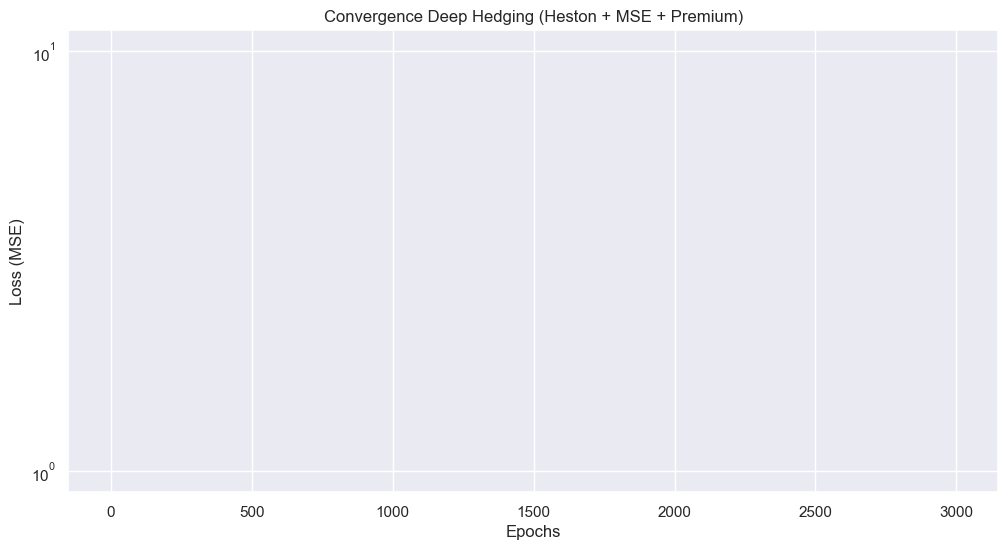

In [ ]:
# --- PARAMÈTRES ---
S0 = 100; K = 100; T = 1.0; N_STEPS = 30
BATCH_SIZE = 256
LR = 0.001 

# --- CONFIGURATION ---
sim = MarketSimulator(s0=S0, r=0.0, sigma=0.2)
# input_dim=4 (Moneyness, Time, Vol, Returns)
model = DeepHedgingModel(input_dim=4, hidden_dim=32, output_dim=1) 
optimizer = optim.Adam(model.parameters(), lr=LR)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=50)

# Aversion au risque plus douce pour commencer
RISK_AVERSION = 1.0 
engine = HedgingEngine(model, optimizer, criterion=None, transaction_cost_pct=0.0, risk_aversion=RISK_AVERSION)

# --- CURRICULUM AVEC WARMUP ---
# (Debut, Fin, Coût, Utiliser_MSE)
phases = [
    (0, 200, 0.0, True),       # WARMUP: Pas de frais, MSE Loss (Stabilisation)
    (200, 1000, 0.001, False), # PHASE 2: Petits frais, Entropic Loss
    (1000, 3000, 0.005, False) # PHASE 3: Vrais frais, Entropic Loss
]

history = []
pbar = tqdm(range(3000))

print("🚀 Démarrage (Warmup MSE -> Entropic)...")

for epoch in pbar:
    # 1. Configuration de la phase
    current_cost = 0.0
    use_mse = False
    for start, end, cost, mse_mode in phases:
        if start <= epoch < end:
            current_cost = cost
            use_mse = mse_mode
            break
            
    engine.cost_pct = current_cost
    
    # 2. Données
    spots, inputs = prepare_batch(sim, BATCH_SIZE, T, N_STEPS, strike=K)
    strikes = torch.full((BATCH_SIZE,), K)
    
    # 3. Premium Initial
    S0_b = spots[:, 0]; Vol0_b = inputs[:, 0, 2]
    bs_p = BlackScholesOracle.get_price(S0_b.numpy(), K, T, 0.0, Vol0_b.numpy(), 'call')
    init_prices = torch.tensor(bs_p, dtype=torch.float32)
    
    # 4. Train Step (Avec le flag use_mse)
    loss, mean_pnl = engine.train_step(spots, strikes, inputs, init_prices, use_mse=use_mse)
    
    if not np.isnan(loss):
        scheduler.step(loss)
        history.append(loss)
    
    if epoch % 10 == 0:
        mode_str = "MSE" if use_mse else "ENT"
        pbar.set_description(f"Ep {epoch}| {mode_str} | C:{current_cost*100:.1f}% | Loss:{loss:.2f} | PnL:{mean_pnl:.2f}")

plt.plot(history)
plt.title("Convergence (Warmup MSE puis Transition Entropique)")
plt.yscale('log')
plt.show()

🚀 Lancement du Benchmark sur 2048 scénarios Heston...
   Frais de transaction appliqués : 0.50%


  0%|          | 0/8 [00:00<?, ?it/s]/Users/jeenyuhs/Desktop/projet_sauvetage/notebook/projet-3A/projet-3A/src/analytics_models.py:49: RuntimeWarning: invalid value encountered in divide
  d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
100%|██████████| 8/8 [00:00<00:00, 111.32it/s]


📊 RÉSULTATS COMPARATIFS (2048 scénarios)
--------------------------------------------------
Stratégie          | Mean PnL ($) | Std Dev (Risk) | Sharpe Simplifié
--------------------------------------------------
Black-Scholes      |          nan |            nan |        nan
Deep Hedging (IA)  |          nan |            nan |        nan
--------------------------------------------------
🏆 Win Rate de l'IA : 0.00% (L'IA bat BS sur 0 scénarios)



/Users/jeenyuhs/Desktop/projet_sauvetage/.venv/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges
/Users/jeenyuhs/Desktop/projet_sauvetage/.venv/lib/python3.12/site-packages/numpy/lib/_histograms_impl.py:897: RuntimeWarning: invalid value encountered in divide
  return n / db / n.sum(), bin_edges


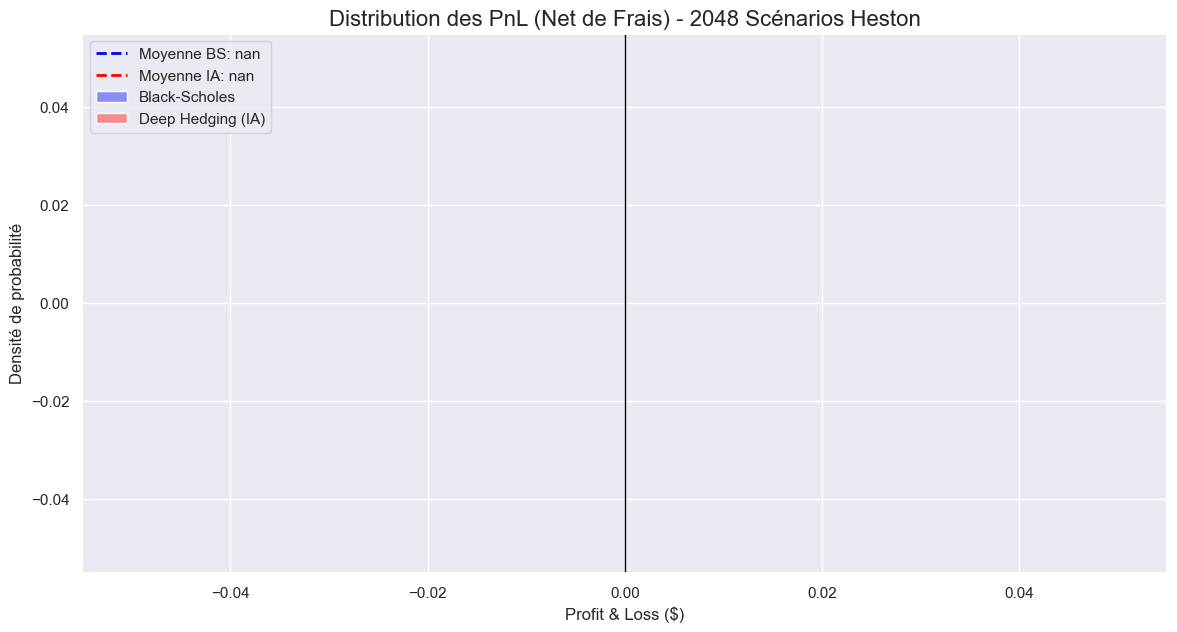

In [5]:
# --- PARAMÈTRES DU TEST ---
N_TEST_PATHS = 2048   # Un grand nombre pour avoir une stat fiable
TEST_BATCH_SIZE = 256 # On procède par batch pour ne pas saturer la RAM
Strike_Test = 100.0

# Listes pour stocker les résultats
all_ai_pnls = []
all_bs_pnls = []

print(f"🚀 Lancement du Benchmark sur {N_TEST_PATHS} scénarios Heston...")

# On s'assure que le modèle est en mode évaluation (figé)
model.eval()

# On utilise le moteur actuel pour le calcul de PnL (avec les frais de la Phase 3 !)
# Assure-toi que engine.cost_pct est bien réglé sur 0.5% (ou la valeur finale)
print(f"   Frais de transaction appliqués : {engine.cost_pct * 100:.2f}%")

with torch.no_grad():
    # Boucle par batch pour générer N_TEST_PATHS
    for _ in tqdm(range(0, N_TEST_PATHS, TEST_BATCH_SIZE)):
        
        # 1. Génération données Heston
        spots, inputs = prepare_batch(sim, TEST_BATCH_SIZE, T, N_STEPS, strike=Strike_Test)
        strikes = torch.full((TEST_BATCH_SIZE,), Strike_Test)
        
        # 2. Calcul du Premium Initial (BS) pour ce batch
        # C'est l'argent reçu au départ. Nécessaire pour un PnL juste.
        S0 = spots[:, 0]
        Vol0 = inputs[:, 0, 2] # Volatilité initiale fournie par Heston
        
        initial_premiums_np = BlackScholesOracle.get_price(
            S=S0.numpy(), K=Strike_Test, T=T, r=0.0, sigma=Vol0.numpy(), option_type='call'
        )
        initial_premiums = torch.tensor(initial_premiums_np, dtype=torch.float32)
        
        # --- STRATÉGIE IA ---
        ai_deltas = model(inputs)
        ai_pnl = engine._compute_pnl(spots, strikes, ai_deltas, T, initial_prices=initial_premiums)
        all_ai_pnls.extend(ai_pnl.numpy())
        
        # --- STRATÉGIE BLACK-SCHOLES (BENCHMARK) ---
        # On recalcule le Delta BS dynamique pour chaque pas de temps
        # Vectorisation pour la vitesse :
        # inputs[:, :, 0] -> LogMoneyness (Pas besoin ici, on a spots)
        # inputs[:, :, 1] -> Time to maturity
        # inputs[:, :, 2] -> Volatilité Heston (On donne la vraie vol à BS pour qu'il soit fort)
        
        bs_deltas_list = []
        for t in range(spots.shape[1]): # Boucle sur le temps (30 pas)
            S_t = spots[:, t].numpy()
            Vol_t = inputs[:, t, 2].numpy() # BS voit la vraie vol
            Time_t = inputs[:, t, 1].numpy()
            
            # Delta BS
            d = BlackScholesOracle.get_delta(S_t, Strike_Test, Time_t, r=0.0, sigma=Vol_t, option_type='call')
            bs_deltas_list.append(d)
            
        # Reconstitution forme [Batch, Time, 1]
        bs_deltas = torch.tensor(np.array(bs_deltas_list)).T.unsqueeze(-1).float()
        
        # Calcul PnL BS (avec les MÊMES frais que l'IA)
        bs_pnl = engine._compute_pnl(spots, strikes, bs_deltas, T, initial_prices=initial_premiums)
        all_bs_pnls.extend(bs_pnl.numpy())

# Conversion en arrays numpy pour l'analyse
all_ai_pnls = np.array(all_ai_pnls)
all_bs_pnls = np.array(all_bs_pnls)

# --- ANALYSE STATISTIQUE ---
mean_ai = np.mean(all_ai_pnls)
std_ai = np.std(all_ai_pnls)
mean_bs = np.mean(all_bs_pnls)
std_bs = np.std(all_bs_pnls)

# Ratio de victoire (Combien de fois l'IA fait mieux que BS ?)
# "Mieux" veut dire un PnL plus élevé (moins de perte ou plus de gain)
wins = np.sum(all_ai_pnls > all_bs_pnls)
win_rate = (wins / len(all_ai_pnls)) * 100

print(f"\n📊 RÉSULTATS COMPARATIFS ({N_TEST_PATHS} scénarios)")
print("-" * 50)
print(f"Stratégie          | Mean PnL ($) | Std Dev (Risk) | Sharpe Simplifié")
print("-" * 50)
print(f"Black-Scholes      | {mean_bs:12.4f} | {std_bs:14.4f} | {mean_bs/std_bs:10.4f}")
print(f"Deep Hedging (IA)  | {mean_ai:12.4f} | {std_ai:14.4f} | {mean_ai/std_ai:10.4f}")
print("-" * 50)
print(f"🏆 Win Rate de l'IA : {win_rate:.2f}% (L'IA bat BS sur {wins} scénarios)")

# --- VISUALISATION ---
plt.figure(figsize=(14, 7))

# Histogrammes superposés
sns.histplot(all_bs_pnls, color='blue', alpha=0.4, label='Black-Scholes', kde=True, stat="density")
sns.histplot(all_ai_pnls, color='red', alpha=0.4, label='Deep Hedging (IA)', kde=True, stat="density")

# Lignes verticales pour les moyennes
plt.axvline(mean_bs, color='blue', linestyle='--', linewidth=2, label=f'Moyenne BS: {mean_bs:.2f}')
plt.axvline(mean_ai, color='red', linestyle='--', linewidth=2, label=f'Moyenne IA: {mean_ai:.2f}')
plt.axvline(0, color='black', linewidth=1) # Zéro PnL

plt.title(f"Distribution des PnL (Net de Frais) - {N_TEST_PATHS} Scénarios Heston", fontsize=16)
plt.xlabel("Profit & Loss ($)")
plt.ylabel("Densité de probabilité")
plt.legend()
plt.show()